In [1]:
import pandas as pd
import numpy as np
import arviz as az
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions


/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [ ]:
#!pip install --upgrade cmdstanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 KB 3.5 MB/s eta 0:00:00
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8


In [2]:
import cmdstanpy
#cmdstanpy.install_cmdstan()
from cmdstanpy import cmdstan_path, CmdStanModel

In [ ]:
from scipy.stats import norm

In [3]:
# read data from csv file
df = pd.read_csv("traintransfcoor.csv", sep=";")
W = pd.read_csv("Adjmatrixout.csv", sep=";")
k = pd.read_csv("index_Neighh.csv", sep=";")

In [4]:
df

price  Overall.Qual  Garage.Area  Total.Bsmt.SF  X1st.Flr.SF  Full.Bath  \
0     5.237             7        7.637         10.640       10.640          2   
1     5.288             7        7.637         10.640       11.233          0   
2     5.323             7        6.271         10.479       11.080          2   
3     5.204             7        6.271         10.151       10.151          2   
4     5.241             7        7.707         11.116       11.830          2   
...     ...           ...          ...            ...          ...        ...   
2315  5.259             6        6.434         10.657       10.657          2   
2316  5.572             8        7.800         14.883       14.991          2   
2317  5.585             9        8.970         12.876       12.876          0   
2318  5.176             9        8.818          9.458       11.996          2   
2319  5.462             8        7.036         11.329       12.263          3   

      AgeofHouse  Mas.Vnr.Area  TotRms.AbvGrd  Fireplaces  Wood.Deck.SF  \
0              0         2.546              6           1         3.600   
1              0         2.546              7           1         3.286   
2              0         1.122              6           1         3.000   
3              1         1.122              6           0         3.000   
4              1         3.421              7           1         3.587   
...          ...           ...            ...         ...           ...   
2315           7         0.000              6           1         5.179   
2316           6         0.000              7           2         4.893   
2317           4         0.000              5           1         8.782   
2318           7         9.721              9           1         3.550   
2319           1         0.000              6           1         5.020   

       Longitude   Latitude Neighborhood  
0     -93,641795  42,062584      Blmngtn  
1     -93,641716  42,062581      Blmngtn  
2     -93,641662  42,062574      Blmngtn  
3     -93,641635   42,06257      Blmngtn  
4     -93,641561  42,062562      Blmngtn  
...          ...        ...          ...  
2315  -93,645544  42,042961      Veenker  
2316  -93,658232  42,037103      Veenker  
2317  -93,658237  42,037409      Veenker  
2318  -93,655582  42,036729      Veenker  
2319  -93,658315  42,037578      Veenker  

[2320 rows x 14 columns]

In [5]:
W

Blmngtn  Blueste  BrDale  BrkSide  ClearCr  CollgCr  Crawfor  \
Blmngtn        0        0       0        0        0        0        0   
Blueste        0        0       0        0        0        0        1   
BrDale         0        0       0        0        0        0        0   
BrkSide        0        0       0        0        0        0        0   
ClearCr        0        0       0        0        0        1        0   
CollgCr        0        0       0        0        1        0        0   
Crawfor        0        1       0        0        0        0        0   
Edwards        0        0       0        0        1        1        0   
Gilbert        1        0       0        0        0        0        0   
IDOTRR         0        0       0        1        0        0        0   
MeadowV        0        0       0        0        0        0        0   
Mitchel        0        0       0        0        0        0        0   
NAmes          0        0       1        1        0        0        0   
NoRidge        0        0       0        0        0        0        0   
NPkVill        0        0       1        0        0        0        0   
NridgHt        0        0       0        0        0        0        0   
NWAmes         0        0       1        0        0        0        0   
OldTown        0        0       0        1        0        0        0   
Sawyer         0        0       0        0        1        0        0   
SawyerW        0        0       0        0        1        1        0   
Somerst        0        0       0        0        0        0        0   
StoneBr        0        0       0        0        0        0        0   
SWISU          0        0       0        0        0        0        1   
Timber         0        1       0        0        0        0        0   
Veenker        0        0       0        0        0        0        0   

         Edwards  Gilbert  IDOTRR  ...  NridgHt  NWAmes  OldTown  Sawyer  \
Blmngtn        0        1       0  ...        0       0        0       0   
Blueste        0        0       0  ...        0       0        0       0   
BrDale         0        0       0  ...        0       1        0       0   
BrkSide        0        0       1  ...        0       0        1       0   
ClearCr        1        0       0  ...        0       0        0       1   
CollgCr        1        0       0  ...        0       0        0       0   
Crawfor        0        0       0  ...        0       0        0       0   
Edwards        0        0       0  ...        0       0        0       0   
Gilbert        0        0       0  ...        0       1        0       0   
IDOTRR         0        0       0  ...        0       0        1       0   
MeadowV        0        0       0  ...        0       0        0       0   
Mitchel        0        0       0  ...        0       0        0       0   
NAmes          0        0       0  ...        0       1        1       0   
NoRidge        0        0       0  ...        1       0        0       0   
NPkVill        0        0       0  ...        0       0        0       0   
NridgHt        0        0       0  ...        0       0        0       0   
NWAmes         0        1       0  ...        0       0        0       0   
OldTown        0        0       1  ...        0       0        0       0   
Sawyer         0        0       0  ...        0       0        0       0   
SawyerW        0        0       0  ...        0       0        0       1   
Somerst        0        1       0  ...        0       1        0       0   
StoneBr        0        1       0  ...        0       0        0       0   
SWISU          1        0       0  ...        0       0        0       0   
Timber         0        0       0  ...        0       0        0       0   
Veenker        0        0       0  ...        0       0        0       0   

         SawyerW  Somerst  StoneBr  SWISU  Timber  Veenker  
Blmngtn        0        0        0      0       0        0  
Blueste    

In [6]:
k

x
0      1
1      1
2      1
3      1
4      1
...   ..
2315  25
2316  25
2317  25
2318  25
2319  25

[2320 rows x 1 columns]

In [7]:
Y=df['price'].values

In [8]:
X=df[['Overall.Qual','Garage.Area','Total.Bsmt.SF','X1st.Flr.SF','Full.Bath','AgeofHouse','Mas.Vnr.Area','TotRms.AbvGrd','Fireplaces','Wood.Deck.SF']].values

In [9]:
W=W.values

In [10]:
row=k.iloc[:,0]

In [11]:
vector=row.to_numpy()

In [12]:
# Define the data
# Read in the data
# Extract the response variable and covariates
import os
import cmdstanpy

# Define the Stan model

stan_model = '''
data {
    int<lower=1> N; // number of houses
    int<lower=1> K; // number of neighborhoods
    int<lower=1> p; // number of covariates
    vector<lower=0>[N] Y; // response variable (price)
    matrix[N, p] X; // matrix of covariates
    matrix[K, K] W; // adjacency matrix of neighborhoods
    vector <lower=1, upper=K>[N] k; // neighborhood id for each house
    real<lower=0> a; // shape parameter for inverse-gamma prior
    real<lower=0> b; // scale parameter for inverse-gamma prior    
}
parameters {
    vector[p] beta; // neighborhood-specific coefficients
    real beta_intercept;
    vector[K] phi; // random effect for each neighborhood 
    real<lower=0> nu2; // common variance of response variable
    real<lower=0> tau2; // common variance of random effects
    real<lower=0, upper=1> rho; // correlation between random effects across neighborhoods
}
model {
    for (j in 1:p) {
        beta[j] ~ normal(0, 10);
    }
    beta_intercept ~ normal(4.5, 0.01);
    for (q in 1:K) {
         phi[q] ~ normal(rho*W[q,:]*phi/(rho*sum(W[q,:])+1-rho), sqrt(tau2/(rho*sum(W[q,:]) + 1-rho)));
    }
    nu2 ~ inv_gamma(a, b);
    tau2 ~ inv_gamma(a, b);
    rho ~ uniform(0, 1);
    for (i in 1:N) {
      for(l in 1:K){
        if(k[i]==l)
         Y[i] ~ normal(beta_intercept + X[i,:]*beta + phi[l], sqrt(nu2));       
      }
    }
}

'''


# Save the Stan model to file
with open("model.stan","w") as f:
    f.write(stan_model)


In [13]:
# Compile the model
stan_model = cmdstanpy.CmdStanModel(stan_file='model.stan')


15:49:47 - cmdstanpy - INFO - compiling stan file /root/model.stan to exe file /root/model
15:50:04 - cmdstanpy - INFO - compiled model executable: /root/model


In [14]:
# Prepare and run the sampling
data = {"N":2320, "K": 25, "p":10, "Y": Y, "X":X, "W": W, "k":vector, "a": 0.1, "b": 0.1 }


In [15]:
fit = stan_model.sample(data=data, chains=4, parallel_chains=4, 
                             iter_warmup=1000, iter_sampling=7000)

15:50:24 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:11:10 - cmdstanpy - INFO - CmdStan done processing.
16:11:10 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/root/model.stan', line 27, column 9 to column 103)
Consider re-running with show_console=True if the above output is unclear!


In [16]:
cmdstanpy_data = az.from_cmdstanpy(fit)

In [17]:
az.rcParams["plot.max_subplots"] = 200

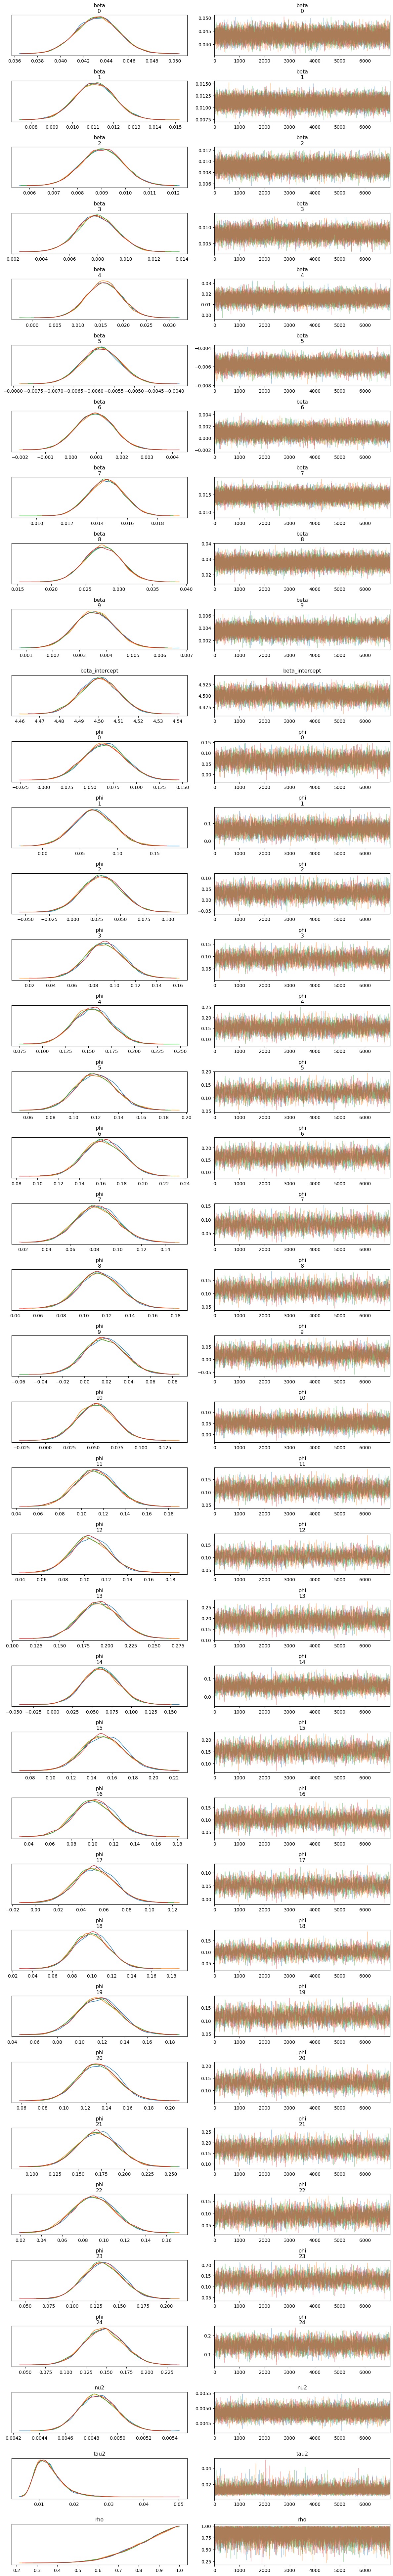

In [18]:
az.plot_trace(cmdstanpy_data, compact=False)
plt.tight_layout()
plt.show()

In [19]:
np.sum(cmdstanpy_data.sample_stats.diverging)

<xarray.DataArray 'diverging' ()>
array(0)

In [20]:
fit.summary()

Mean      MCSE    StdDev           5%          50%  \
lp__            5070.160000  0.045346  4.467650  5062.250000  5070.480000   
beta[1]            0.043238  0.000019  0.001846     0.040183     0.043248   
beta[2]            0.011080  0.000005  0.000965     0.009492     0.011083   
beta[3]            0.009028  0.000004  0.000877     0.007595     0.009030   
beta[4]            0.007973  0.000014  0.001405     0.005658     0.007953   
beta[5]            0.015699  0.000026  0.003868     0.009310     0.015707   
beta[6]           -0.005830  0.000004  0.000484    -0.006629    -0.005830   
beta[7]            0.000942  0.000005  0.000760    -0.000308     0.000944   
beta[8]            0.014595  0.000007  0.001198     0.012614     0.014599   
beta[9]            0.027651  0.000021  0.002747     0.023126     0.027641   
beta[10]           0.003543  0.000004  0.000740     0.002335     0.003537   
beta_intercept     4.500364  0.000143  0.009883     4.484010     4.500400   
phi[1]             0.065400  0.000426  0.022669     0.028303     0.065401   
phi[2]             0.068639  0.000410  0.026895     0.024518     0.068325   
phi[3]             0.030246  0.000372  0.020968    -0.003735     0.030078   
phi[4]             0.091080  0.000383  0.018010     0.061786     0.090848   
phi[5]             0.153850  0.000419  0.020952     0.119733     0.153770   
phi[6]             0.119935  0.000404  0.018084     0.090721     0.119621   
phi[7]             0.163087  0.000408  0.018973     0.132339     0.162689   
phi[8]             0.082329  0.000389  0.017628     0.053718     0.081998   
phi[9]             0.113743  0.000392  0.017950     0.084752     0.113366   
phi[10]            0.018146  0.000381  0.018316    -0.011598     0.017859   
phi[11]            0.053277  0.000352  0.019753     0.020899     0.053195   
phi[12]            0.112660  0.000400  0.018576     0.082784     0.112434   
phi[13]            0.105496  0.000397  0.017579     0.077016     0.105095   
phi[14]            0.191937  0.000441  0.021351     0.157121     0.191578   
phi[15]            0.060972  0.000416  0.023115     0.023453     0.060760   
phi[16]            0.151705  0.000440  0.020078     0.119232     0.151372   
phi[17]            0.101616  0.000417  0.019020     0.070938     0.101361   
phi[18]            0.052214  0.000387  0.017441     0.023894     0.051955   
phi[19]            0.099738  0.000388  0.017797     0.071211     0.099501   
phi[20]            0.117086  0.000408  0.018818     0.086456     0.116841   
phi[21]            0.132176  0.000417  0.018935     0.101620     0.131859   
phi[22]            0.171275  0.000455  0.022146     0.135280     0.170993   
phi[23]            0.090277  0.000405  0.020468     0.056800     0.090087   
phi[24]            0.132779  0.000434  0.020659     0.099526     0.132407   
phi[25]            0.146937  0.000449  0.024346     0.107272     0.146822   
nu2                0.004850  0.000000  0.000140     0.004620     0.004850   
tau2               0.012920  0.000030  0.004010     0.007830     0.012240   
rho                0.849350  0.000950  0.117660     0.622530     0.875480   

                        95%        N_Eff    N_Eff/s     R_hat  
lp__            5076.850000   9706.80000   2.495820  1.000380  
beta[1]            0.046248   9791.71000   2.517650  1.000030  
beta[2]            0.012660  34044.90000   8.753650  0.999901  
beta[3]            0.010475  40012.40000  10.288000  0.999985  
beta[4]            0.010308  10491.40000   2.697560  1.000060  
beta[5]            0.022044  22063.20000   5.672920  1.000010  
beta[6]           -0.005029  13467.50000   3.462780  1.000040  
beta[7]            0.002192  26250.90000   6.749650  1.000090  
beta[8]            0.016546  30830.10000   7.927070  1.000020  
beta[9]            0.032168  17732.40000   4.559380  0.999941  
beta[10]           0.004756  38242.50000   9.832950  0.999948  
beta_intercept     4.516610   4766.82379   1.225651  1.000183  
phi[1]             0.102799   283

In [ ]:
#0.95-CI for beta[7] contains zero --> we re-run the model without Mas.Vnr.Area

In [30]:
X2=df[['Overall.Qual','Garage.Area','Total.Bsmt.SF','X1st.Flr.SF','Full.Bath','AgeofHouse','TotRms.AbvGrd','Fireplaces','Wood.Deck.SF']].values

In [31]:
# Prepare and run the sampling
data2 = {"N":2320, "K": 25, "p":9, "Y": Y, "X":X2, "W": W, "k":vector, "a": 0.1, "b": 0.1 }

In [32]:
fit2 = stan_model.sample(data=data2, chains=4, parallel_chains=4, 
                             iter_warmup=1000, iter_sampling=7000)

16:18:51 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:38:16 - cmdstanpy - INFO - CmdStan done processing.


In [33]:
cmdstanpy_data2 = az.from_cmdstanpy(fit2)

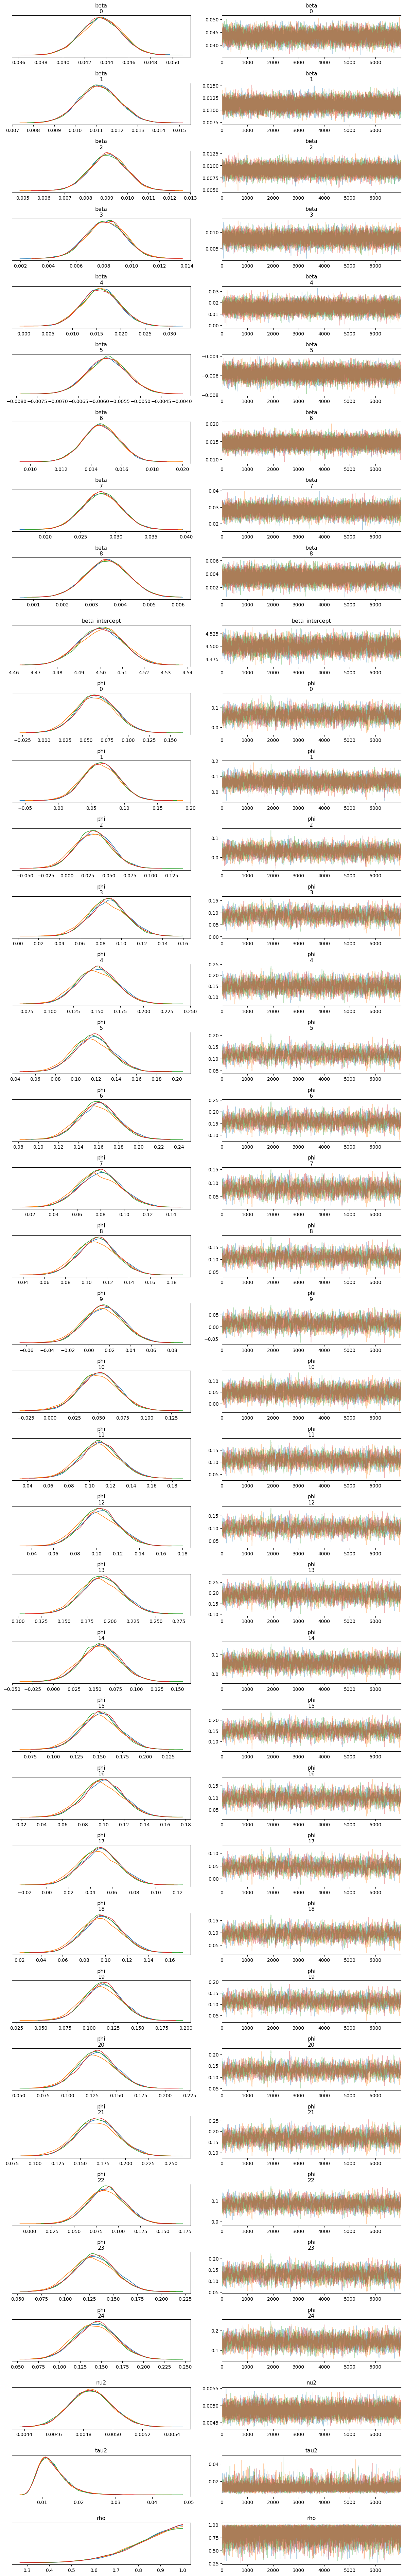

In [34]:
az.plot_trace(cmdstanpy_data2, compact=False)
plt.tight_layout()
plt.show()

In [35]:
np.sum(cmdstanpy_data2.sample_stats.diverging)

<xarray.DataArray 'diverging' ()>
array(0)

In [36]:
fit2.summary()

Mean      MCSE    StdDev           5%          50%  \
lp__            5069.840000  0.047642  4.424360  5062.060000  5070.190000   
beta[1]            0.043493  0.000021  0.001835     0.040463     0.043492   
beta[2]            0.011135  0.000005  0.000974     0.009540     0.011127   
beta[3]            0.009069  0.000004  0.000885     0.007614     0.009068   
beta[4]            0.008134  0.000016  0.001407     0.005827     0.008141   
beta[5]            0.015800  0.000027  0.003899     0.009391     0.015796   
beta[6]           -0.005803  0.000005  0.000489    -0.006603    -0.005802   
beta[7]            0.014645  0.000007  0.001187     0.012690     0.014630   
beta[8]            0.027975  0.000023  0.002732     0.023479     0.027965   
beta[9]            0.003551  0.000004  0.000743     0.002323     0.003550   
beta_intercept     4.500226  0.000178  0.010127     4.483420     4.500290   
phi[1]             0.062002  0.000522  0.023365     0.023987     0.061780   
phi[2]             0.064281  0.000491  0.027127     0.019998     0.064216   
phi[3]             0.031716  0.000469  0.021562    -0.003387     0.031725   
phi[4]             0.087314  0.000474  0.018511     0.057064     0.087120   
phi[5]             0.150111  0.000515  0.021457     0.115128     0.149949   
phi[6]             0.117140  0.000506  0.018862     0.086412     0.117049   
phi[7]             0.159643  0.000503  0.019483     0.127716     0.159478   
phi[8]             0.079234  0.000484  0.018214     0.049395     0.079046   
phi[9]             0.109989  0.000486  0.018455     0.079893     0.109893   
phi[10]            0.014497  0.000471  0.018841    -0.015968     0.014309   
phi[11]            0.050402  0.000440  0.020259     0.017424     0.050243   
phi[12]            0.109459  0.000492  0.019084     0.078447     0.109352   
phi[13]            0.102812  0.000497  0.018230     0.073062     0.102593   
phi[14]            0.191115  0.000556  0.022175     0.155046     0.190854   
phi[15]            0.056686  0.000509  0.023623     0.017891     0.056573   
phi[16]            0.150791  0.000556  0.021025     0.116282     0.150652   
phi[17]            0.099629  0.000526  0.019809     0.067121     0.099469   
phi[18]            0.048340  0.000482  0.017988     0.019024     0.048282   
phi[19]            0.096590  0.000481  0.018371     0.066663     0.096447   
phi[20]            0.113864  0.000507  0.019353     0.082404     0.113723   
phi[21]            0.129563  0.000518  0.019690     0.097542     0.129358   
phi[22]            0.168512  0.000568  0.022830     0.131205     0.168307   
phi[23]            0.086235  0.000504  0.020947     0.051989     0.086200   
phi[24]            0.130283  0.000538  0.021409     0.095123     0.130029   
phi[25]            0.143282  0.000555  0.024853     0.102588     0.143270   
nu2                0.004850  0.000000  0.000140     0.004620     0.004850   
tau2               0.012880  0.000030  0.003990     0.007800     0.012170   
rho                0.848380  0.000910  0.118100     0.616430     0.874500   

                        95%         N_Eff    N_Eff/s     R_hat  
lp__            5076.500000   8624.140000   2.445440  1.000560  
beta[1]            0.046503   7586.860000   2.151320  1.000720  
beta[2]            0.012742  34506.100000   9.784480  0.999956  
beta[3]            0.010508  39626.700000  11.236500  0.999966  
beta[4]            0.010441   7797.810000   2.211130  1.000560  
beta[5]            0.022246  20582.300000   5.836270  1.000060  
beta[6]           -0.004994  10138.800000   2.874930  1.000450  
beta[7]            0.016602  29783.200000   8.445250  1.000090  
beta[8]            0.032453  14327.200000   4.062600  1.000280  
beta[9]            0.004774  36746.800000  10.419800  0.999914  
beta_intercept     4.516760   3226.419284   0.914877  1.001358  
phi[1]             0.100522   2000.960000   0.567388  1.002260  
phi[2]             0.108922   3057.090000   0.866863  1.001640  
phi[3]             0.067412   21

In [ ]:
#No 0.95-CI for betas contains zero
#Good mixing and covergence of the chains
#Random effects have modeled a lot of spatial autocorrelation, as the posterior mean for rho is 0.848380
#--> we proceed by computing WAIC for our model

In [169]:
DF = fit2.draws_pd()

In [170]:
DF

lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  \
0      5068.21       0.945888    0.024973          6.0          63.0   
1      5067.67       0.591932    0.024973          6.0          63.0   
2      5061.85       0.929306    0.024973          7.0         127.0   
3      5059.49       1.000000    0.024973          6.0          63.0   
4      5060.53       1.000000    0.024973          6.0          63.0   
...        ...            ...         ...          ...           ...   
27995  5068.23       0.999403    0.024584          6.0          63.0   
27996  5070.94       0.999741    0.024584          6.0         127.0   
27997  5065.57       0.998697    0.024584          7.0         127.0   
27998  5066.76       0.870463    0.024584          6.0          63.0   
27999  5068.56       0.815374    0.024584          6.0         127.0   

       divergent__  energy__   beta[1]   beta[2]   beta[3]  ...   phi[19]  \
0              0.0  -5048.74  0.038676  0.011218  0.010167  ...  0.133086   
1              0.0  -5044.60  0.042703  0.010430  0.007922  ...  0.136503   
2              0.0  -5044.15  0.044431  0.008633  0.009680  ...  0.130586   
3              0.0  -5038.77  0.043569  0.010047  0.009389  ...  0.140545   
4              0.0  -5043.45  0.042806  0.009883  0.009303  ...  0.139312   
...            ...       ...       ...       ...       ...  ...       ...   
27995          0.0  -5054.75  0.042498  0.011087  0.009396  ...  0.102097   
27996          0.0  -5056.05  0.043853  0.012469  0.009501  ...  0.105608   
27997          0.0  -5054.39  0.039802  0.011778  0.009950  ...  0.102337   
27998          0.0  -5042.18  0.045135  0.008969  0.008925  ...  0.114144   
27999          0.0  -5048.25  0.043257  0.010824  0.008491  ...  0.110686   

        phi[20]   phi[21]   phi[22]   phi[23]   phi[24]   phi[25]       nu2  \
0      0.152268  0.181805  0.224245  0.139749  0.176173  0.181328  0.004856   
1      0.146868  0.161694  0.210859  0.115360  0.174916  0.162855  0.004755   
2      0.164666  0.178685  0.211029  0.123160  0.173932  0.179207  0.004845   
3      0.169260  0.166350  0.218664  0.126257  0.160325  0.181142  0.004921   
4      0.162306  0.161022  0.222399  0.125574  0.156521  0.189527  0.004836   
...         ...       ...       ...       ...       ...       ...       ...   
27995  0.123915  0.142628  0.185440  0.076396  0.132700  0.126289  0.004625   
27996  0.110494  0.126927  0.162048  0.103826  0.131062  0.170707  0.004918   
27997  0.119978  0.138812  0.187521  0.079876  0.147370  0.136153  0.004957   
27998  0.125604  0.146628  0.176513  0.092407  0.132603  0.154999  0.004816   
27999  0.124554  0.135473  0.186640  0.089862  0.139838  0.143161  0.004736   

           tau2       rho  
0      0.016470  0.532866  
1      0.018588  0.831346  
2      0.016850  0.864017  
3      0.020189  0.901953  
4      0.021504  0.903277  
...         ...       ...  
27995  0.010213  0.899390  
27996  0.009539  0.722496  
27997  0.011428  0.965144  
27998  0.012268  0.974055  
27999  0.012610  0.993597  

[28000 rows x 45 columns]

In [171]:
colname = DF.columns

In [172]:
colname

Index(['lp__', 'accept_stat__', 'stepsize__', 'treedepth__', 'n_leapfrog__',
       'divergent__', 'energy__', 'beta[1]', 'beta[2]', 'beta[3]', 'beta[4]',
       'beta[5]', 'beta[6]', 'beta[7]', 'beta[8]', 'beta[9]', 'beta_intercept',
       'phi[1]', 'phi[2]', 'phi[3]', 'phi[4]', 'phi[5]', 'phi[6]', 'phi[7]',
       'phi[8]', 'phi[9]', 'phi[10]', 'phi[11]', 'phi[12]', 'phi[13]',
       'phi[14]', 'phi[15]', 'phi[16]', 'phi[17]', 'phi[18]', 'phi[19]',
       'phi[20]', 'phi[21]', 'phi[22]', 'phi[23]', 'phi[24]', 'phi[25]', 'nu2',
       'tau2', 'rho'],
      dtype='object')

In [173]:
beta = np.array(DF[colname[7:16]])
beta_intercept = np.array(DF[colname[16]])
phi = np.array(DF[colname[17:42]])
nu2 = np.array(DF[colname[42]])

In [215]:
N = len(X2)
K = 25
T = 28000
rand_eff = np.zeros((K,T))
mu = np.zeros((N,T))
log_fy = np.zeros((N,T))

In [216]:
for l in range(K):
    rand_eff[l,] =  np.transpose(phi)[l,]

In [217]:
for i in range(N):
    mu[i,] = np.transpose(beta_intercept) + np.matmul(X2, np.transpose(beta))[i,] + rand_eff[vector[i]-1,]

In [218]:
nu2_sqrt = np.sqrt(nu2)

In [219]:
for i in range(N):
    log_fy[i,] = np.log( norm.pdf(Y[i], mu[i,], nu2_sqrt) )

In [221]:
mean_log_fy = log_fy.mean(axis=1)

In [222]:
lppd = mean_log_fy.sum()
lppd

2909.8118153067026

In [223]:
var_log_fy = log_fy.var(axis=1)

In [224]:
pW = var_log_fy.sum()
pW

50.91055477740994

In [225]:
WAIC = -2*(lppd-pW)
WAIC

-5717.802521058586

In [ ]:
#PREDICTION

In [226]:
stime = pd.DataFrame(DF.mean())
print(stime)

                          0
lp__            5069.839487
accept_stat__      0.930510
stepsize__         0.024061
treedepth__        6.557536
n_leapfrog__     130.840000
divergent__        0.000000
energy__       -5050.821253
beta[1]            0.043494
beta[2]            0.011136
beta[3]            0.009069
beta[4]            0.008134
beta[5]            0.015800
beta[6]           -0.005803
beta[7]            0.014645
beta[8]            0.027975
beta[9]            0.003551
beta_intercept     4.500226
phi[1]             0.062002
phi[2]             0.064281
phi[3]             0.031716
phi[4]             0.087314
phi[5]             0.150111
phi[6]             0.117140
phi[7]             0.159643
phi[8]             0.079234
phi[9]             0.109989
phi[10]            0.014497
phi[11]            0.050402
phi[12]            0.109459
phi[13]            0.102812
phi[14]            0.191115
phi[15]            0.056686
phi[16]            0.150791
phi[17]            0.099630
phi[18]            0

In [227]:
beta_pred = [0] * 9
for i in range(9):   
    beta_pred[i] = stime.iloc[7+i,0]

beta_pred

[0.043493525346428565,
 0.011135526767857144,
 0.00906916561142857,
 0.008134093421071428,
 0.01580034108581429,
 -0.005803251321785715,
 0.01464493326642857,
 0.027974878992857142,
 0.003551138425464286]

In [228]:
phi_pred = [0] * 25
for i in range(25):   
    phi_pred[i] = stime.iloc[17+i,0]

phi_pred

[0.062002332298297144,
 0.06428113707100963,
 0.031715950163724284,
 0.08731407233571428,
 0.15011069998928572,
 0.11713955627857142,
 0.15964258025357142,
 0.07923395807142856,
 0.10998871375714285,
 0.014496866743262678,
 0.05040158243499643,
 0.10945909653571428,
 0.10281192527142857,
 0.1911153391785714,
 0.05668590845791214,
 0.15079096278571427,
 0.09962951633214287,
 0.04834017656890356,
 0.09659044710357141,
 0.11386417018571429,
 0.129563098325,
 0.16851239269285714,
 0.08623471828249998,
 0.13028342802499998,
 0.1432815327607143]

In [229]:
beta_intercept_pred = stime.iloc[16,0]
beta_intercept_pred

4.500226343214285

In [230]:
nu2_pred = stime.iloc[42,0]
nu2_pred

0.004850877026071428

In [231]:
test_data = pd.read_csv("testtransfcoor.csv", sep=';')
indextest = pd.read_csv("indexneigh_test.csv", sep=';')

In [232]:
test_data

price  Overall.Qual  Garage.Area  Total.Bsmt.SF  X1st.Flr.SF  Full.Bath  \
0    5.245             7        7.707         11.169       11.883          2   
1    5.369             7        6.148         11.120       11.838          2   
2    5.332             8        6.000         10.704       11.447          2   
3    5.258             7        6.413         11.006       11.634          2   
4    5.056             6        4.874          7.777        7.777          1   
..     ...           ...          ...            ...          ...        ...   
557  5.628             9        9.099         13.342       13.342          2   
558  5.477             7        7.125         10.491       10.695          2   
559  5.390             8        6.708         10.649       10.767          1   
560  5.431             8        6.580         11.596       11.596          1   
561  5.256             8        6.887          5.940       11.568          2   

     AgeofHouse  Mas.Vnr.Area  TotRms.AbvGrd  Fireplaces  Wood.Deck.SF  \
0             1         3.421              7           1         3.587   
1             1         1.273              7           1         3.587   
2             1         1.897              7           1         3.587   
3             1         1.200              7           1         3.747   
4             7         4.884              7           0         0.000   
..          ...           ...            ...         ...           ...   
557           1         5.109              7           1         5.265   
558           4         4.948              7           1         0.000   
559           3         0.000              4           2         3.286   
560           2         0.000              6           1         0.000   
561           7         4.243              5           1         0.000   

      Longitude   Latitude Neighborhood  
0    -93,641515  42,062557      Blmngtn  
1    -93,641946  42,063298      Blmngtn  
2    -93,640287  42,063329      Blmngtn  
3    -93,642597  42,062266      Blmngtn  
4    -93,627855  42,052696       BrDale  
..          ...        ...          ...  
557  -93,651703  41,992964       Timber  
558  -93,661846  42,037652      Veenker  
559  -93,647655  42,045012      Veenker  
560  -93,648931  42,044609      Veenker  
561  -93,645546  42,043019      Veenker  

[562 rows x 14 columns]

In [233]:
indextest

x
0     1
1     1
2     1
3     1
4     3
..   ..
557  24
558  25
559  25
560  25
561  25

[562 rows x 1 columns]

In [234]:
y_test = test_data[['price']]
X_test = test_data[['Overall.Qual','Garage.Area','Total.Bsmt.SF','X1st.Flr.SF','Full.Bath','AgeofHouse','TotRms.AbvGrd','Fireplaces','Wood.Deck.SF']]
index = indextest[['x']]

In [235]:
N_test = len(X_test)

In [236]:
y_pred = [0] * N_test
nu2_pred_sqrt = np.sqrt(nu2_pred)

In [237]:
for i in range(N_test):
    y_pred[i] = np.random.normal(beta_intercept_pred + X_test.iloc[i,:].dot(beta_pred) + phi_pred[index.iloc[i]['x']-1], nu2_pred_sqrt)

In [238]:
# Calculate mean squared error
mse = np.mean((y_test['price'] - y_pred) ** 2)
print("Mean Squared Error: ", mse)

Mean Squared Error:  0.008480501194491183


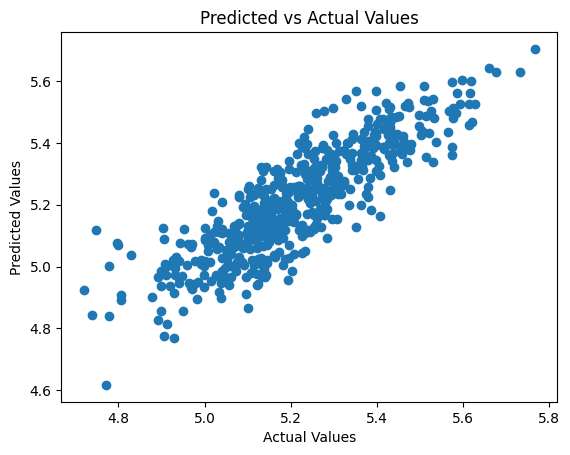

In [239]:
# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

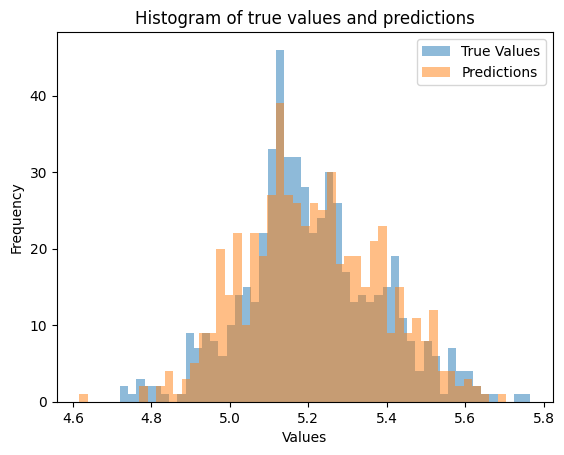

In [246]:
# Histogram
plt.hist(y_test, bins=50, alpha=0.5, label='True Values')
plt.hist(y_pred, bins=50, alpha=0.5, label='Predictions')
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of true values and predictions")
plt.legend()
plt.show()

In [247]:
import pickle

In [250]:
with open('stan_car_fit.pickle','wb') as f:
    pickle.dump(fit2,f)